# Movie Recommendation System

This project builds a movie recommendation system using the MovieLens dataset.
The goal is to understand and implement different recommendation techniques
while learning core Machine Learning concepts step by step.


## 1. Problem Statement

The objective of this project is to recommend movies to users based on:
- Movie content (genres, tags)
- User interaction data (ratings)

Unlike traditional supervised learning problems, recommendation systems
do not have explicit target labels and instead rely on similarity patterns
and user–item interactions.


## 2. Dataset Description

We use the **MovieLens Latest Small** dataset.

Files used:
- movies.csv: Movie titles and genres
- ratings.csv: User ratings for movies
- tags.csv: User-generated tags

This dataset contains:
- 9,742 movies
- 610 users
- 100,836 ratings

The dataset is sparse, which is a common challenge in recommendation systems.


## 3. Type of Machine Learning Problem

This is primarily an **unsupervised learning** problem because:
- There is no explicit target variable
- The system learns from similarity and interaction patterns

Some parts (like rating prediction) can be considered **semi-supervised**.


## 4. Libraries and Environment Setup

The following Python libraries are used for data analysis and visualization:
- NumPy
- Pandas
- Matplotlib
- Seaborn


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [2]:
movies = pd.read_csv("/content/movies.csv")
#ratings = pd.read_csv("data/ratings.csv")

In [3]:
movies = pd.read_csv("/content/movies.csv")


In [4]:
#from IPython.display import display
#display(movies.head())


### Key Data Understanding Questions

Before performing deeper analysis, the following questions were addressed:

- Shape of the data to understand dataset size
- Missing values to determine cleaning requirements
- Number of unique users to assess collaborative filtering readiness
- Number of unique movies to understand catalog size
- Rating scale to guide evaluation strategy


In [5]:
movies


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [6]:
ratings = pd.read_csv("/content/ratings.csv")

In [7]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [8]:
tags = pd.read_csv("/content/tags.csv")
tags.head()


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [9]:
links = pd.read_csv("/content/links.csv")
links.head()


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [10]:
movies.shape

(9742, 3)

In [11]:
movies.size

29226

In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [13]:
movies.value_counts()

,,,count
movieId,title,genres,
193609,Andrew Dice Clay: Dice Rules (1991),Comedy,1
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1
2,Jumanji (1995),Adventure|Children|Fantasy,1
3,Grumpier Old Men (1995),Comedy|Romance,1
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1
...,...,...,...
19,Ace Ventura: When Nature Calls (1995),Comedy,1
18,Four Rooms (1995),Comedy,1
17,Sense and Sensibility (1995),Drama|Romance,1


In [14]:
ratings.shape

(100836, 4)

In [15]:
ratings.size

403344

In [16]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [17]:
ratings.value_counts()
#

userId  movieId  rating  timestamp 
610     170875   3.0     1493846415    1
1       1        4.0     964982703     1
        3        4.0     964981247     1
        6        4.0     964982224     1
610     160080   3.0     1493848031    1
                                      ..
1       151      5.0     964984041     1
        110      4.0     964982176     1
        101      5.0     964980868     1
        70       3.0     964982400     1
        50       5.0     964982931     1
Name: count, Length: 100836, dtype: int64

## 5. Exploratory Data Analysis (EDA)

EDA is performed to understand:
- Rating distribution
- User activity patterns
- Movie popularity bias
- Data sparsity

These insights help in selecting appropriate recommendation algorithms.


### 5.2 Rating Distribution

This section analyzes how ratings are distributed across the dataset.

Understanding rating bias helps in interpreting user preferences.


In [24]:
ratings["rating"].value_counts().sort_index()


,count
rating,
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


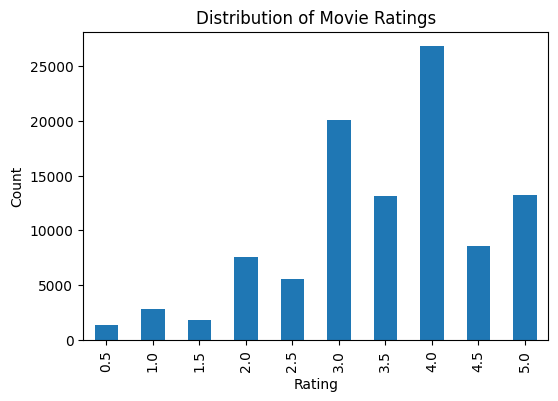

In [25]:
plt.figure(figsize=(6,4))
ratings["rating"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Movie Ratings")
plt.show()


Observation to write later

Ratings are skewed towards higher values

Users rarely give very low ratings

### 5.3 Number of Users and Movies

This section analyzes the scale of the recommendation problem by
counting unique users and movies.


In [26]:
num_users = ratings['userId'].nunique()
num_movies = ratings['movieId'].nunique()

print(num_users,num_movies) #610 no users, 9724 no of movies

610 9724


ML insight:

Many movies, fewer users → data sparsity